<a href="https://colab.research.google.com/github/Neamalinga/univariate-analysis/blob/main/univariate_analysis_of_churn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np



In [ ]:
data=pd.read_csv("/content/drive/MyDrive/eda data sets/EDA-20251117T084022Z-1-001/EDA/Continous_variable_analysis/1.0_Min_Max_Range/churn_prediction.csv")

In [ ]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
data.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,object
dependents,float64
occupation,object
city,float64
customer_nw_category,int64
branch_code,int64
current_balance,float64


In [ ]:
numerical_cols=data.select_dtypes(include=["int64","float64"]).columns

In [ ]:
numerical_cols.max()

'vintage'

In [ ]:
for col in numerical_cols:
  print(f"maximum {data[col].max()}, minimum {data[col].min()}")

maximum 30301, minimum 1
maximum 2476, minimum 73
maximum 90, minimum 1
maximum 52.0, minimum 0.0
maximum 1649.0, minimum 0.0
maximum 3, minimum 1
maximum 4782, minimum 1
maximum 5905904.03, minimum -5503.96
maximum 5740438.63, minimum -3149.57
maximum 5700289.57, minimum 1428.69
maximum 5010170.1, minimum -16506.1
maximum 12269845.39, minimum 0.01
maximum 2361808.29, minimum 0.01
maximum 7637857.36, minimum 0.01
maximum 1414168.06, minimum 0.01
maximum 5778184.77, minimum -3374.18
maximum 5720144.5, minimum -5171.92
maximum 1, minimum 0


In [ ]:
data["current_balance"].max()

5905904.03

In [ ]:
data[data["current_balance"] == data["current_balance"].max()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
9908,10575,2223,90,NaN,NaN,self_employed,243.0,2,2542,5905904.03,...,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0,2019-12-13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing data
data=pd.read(r"/content/drive/MyDrive/eda data sets/EDA-20251117T084022Z-1-001/EDA/Continous_variable_analysis/1.0_Min_Max_Range/churn_prediction.csv")

In [ ]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [ ]:
data.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,object
dependents,float64
occupation,object
city,float64
customer_nw_category,int64
branch_code,int64
current_balance,float64


In [ ]:
chrun_age=data['age'][data['churn']==1]

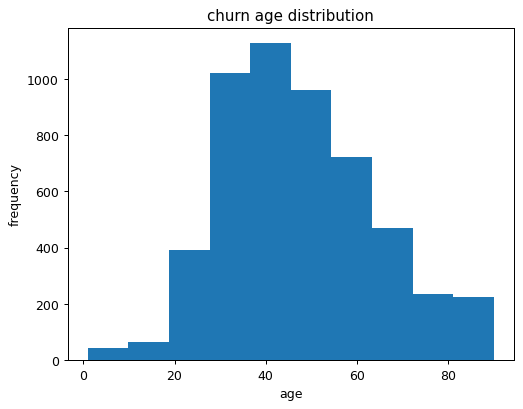

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define churn_age here, using the correct spelling
churn_age = data['age'][data['churn']==1]
plt.figure(dpi=90)
plt.hist(churn_age)
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("churn age distribution")
plt.show()

In [ ]:
mean=churn_age.mean()
median=churn_age.median()
stdev=churn_age.std()

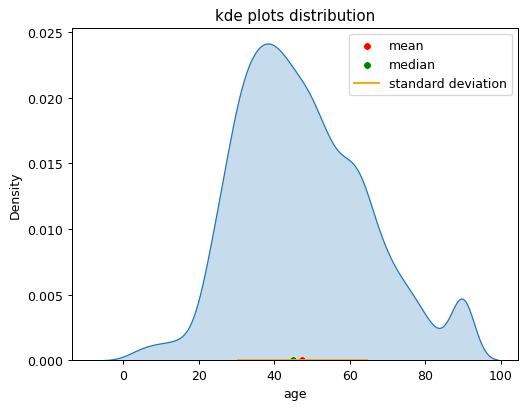

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=90)
sns.kdeplot(churn_age,fill=True)
sns.scatterplot(x=[mean],y=[0],color="red",label="mean")
sns.scatterplot(x=[median],y=[0],color="green",label="median")
sns.lineplot(x=[mean-stdev,mean+stdev],y=[0,0],color="orange",label="standard deviation")
plt.title("kde plots distribution")
plt.show()

In [ ]:
churn_age.skew()

np.float64(0.4537531697430503)

In [ ]:
churn_age.kurtosis()

np.float64(-0.03724906840477349)

In [ ]:
data['current_balance'].skew()

np.float64(99.03068313758813)

In [ ]:
np.sqrt(data['current_balance'].skew())

np.float64(9.951416137293633)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/eda data sets/EDA-20251117T084022Z-1-001/EDA/Continous_variable_analysis/1.0_Min_Max_Range/churn_prediction.csv")

In [ ]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [ ]:
data.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [ ]:
data.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,object
dependents,float64
occupation,object
city,float64
customer_nw_category,int64
branch_code,int64
current_balance,float64


In [ ]:
list(data.columns)

['customer_id',
 'vintage',
 'age',
 'gender',
 'dependents',
 'occupation',
 'city',
 'customer_nw_category',
 'branch_code',
 'current_balance',
 'previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance',
 'churn',
 'last_transaction']

In [ ]:
data.dtypes[data.dtypes=='int64']

,0
customer_id,int64
vintage,int64
age,int64
customer_nw_category,int64
branch_code,int64
churn,int64


In [ ]:
data["churn"]=data['churn'].astype("category")
data["branch_code	"]=data['branch_code'].astype("category")
data["customer_nw_category	"]=data['customer_nw_category	'].astype("category")

In [ ]:
data.dtypes[data.dtypes=='float64']

,0
dependents,float64
city,float64
current_balance,float64
previous_month_end_balance,float64
average_monthly_balance_prevQ,float64
average_monthly_balance_prevQ2,float64
current_month_credit,float64
previous_month_credit,float64
current_month_debit,float64
previous_month_debit,float64


In [ ]:
data['dependents']=data['dependents'].fillna(0).astype('int64')
data['city']=data['city'].fillna(0).astype('int64')


In [ ]:
data[['dependents','city']].dtypes

,0
dependents,int64
city,int64


In [ ]:
data.dtypes[data.dtypes=='object']

,0
gender,object
occupation,object
last_transaction,object


In [ ]:
data['gender']=data['gender'].astype('category')
data['occupation']=data['occupation'].astype('category')


In [ ]:
date=pd.to_datetime(data['last_transaction'])
data['doy']=date.dt.dayofyear
data['moy']=date.dt.month
data['dow']=date.dt.dayofweek



In [ ]:
list[data.columns]

list[Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction', 'doy', 'moy', 'dow'],
      dtype='object')]

In [ ]:
data.drop(columns=['last_transaction'],inplace=True)

In [ ]:
#segregation of variable into groups
customer_details=['customer_id', 'vintage', 'age']
current_month_details=['current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']
previous_month_details=['previous_month_end_balance', 'previous_month_credit', 'previous_month_debit','previous_month_balance']
transaction_date=['doy', 'moy', 'dow']

In [1]:
def uva_numeric(data,var_grp):
  size=len(var_grp)
  plt.figure(figsize=(7*size,3),dpi=90)
  for j,i in enumerate(var_grp):
    min_val=data[i].min()
    max_val=data[i].max()
    stdev_val=data[i].std()
    mean_val=data[i].mean()
    median_val=data[i].median()
    skew_val=data[i].skew()
    kurtosis_val=data[i].kurtosis()

    #point for stdev
    points=[mean_val-stdev_val,mean_val+stdev_val]
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i],fill=True)
    sns.scatterplot(x=[mean_val],y=[0],color="red",label="mean")
    sns.scatterplot(x=[median_val],y=[0],color="green",label="median")
    sns.lineplot(x=points,y=[0,0],color="orange",label="standard deviation")
    plt.xlabel('{}'.format(i),fontsize=20)
    plt.ylabel('density')
    plt.title(f'stdev:{stdev_val:.2f}, skew:{skew_val:.2f}, kurt:{kurtosis_val:.2f}')

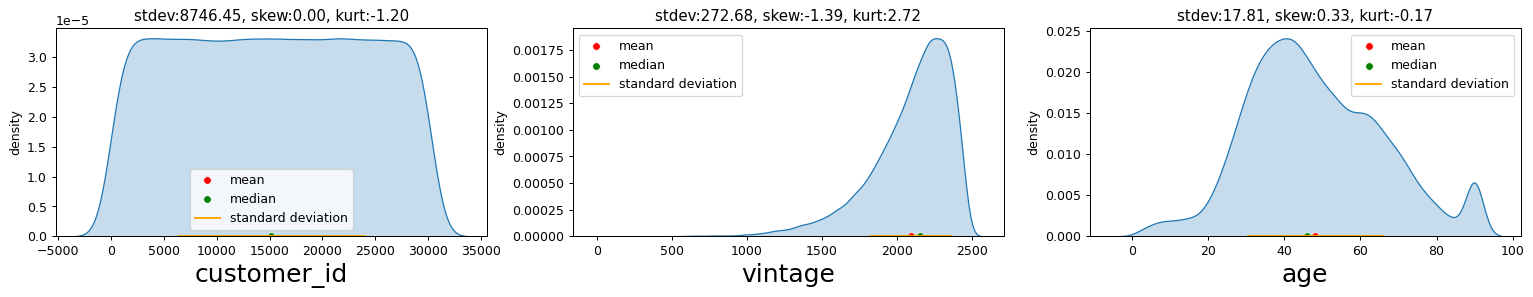

In [ ]:
uva_numeric(data,customer_details)

In [ ]:
#The plots for vintage and age reveal the central tendency and spread of customer tenure and age, respectively, indicating typical customer profiles. Their skewness and kurtosis further describe the shape of these distributions, highlighting any lean towards younger/older customers or newer/older relationships.

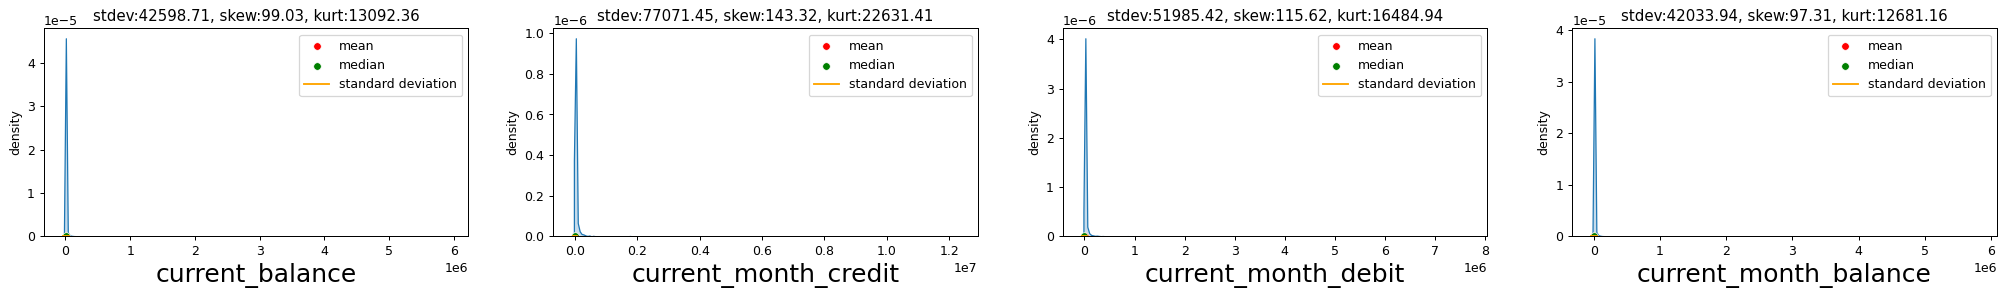

In [ ]:
uva_numeric(data,current_month_details)

In [ ]:
The plots for current month financial details (current_balance, current_month_credit, current_month_debit, current_month_balance) generally show distributions skewed towards lower values, indicating that most customers have moderate balances and transaction activities. The long tails in these distributions highlight a smaller segment of customers with significantly higher financial movements.

In [ ]:
cm_data=data[current_month_details]

In [ ]:
cm_data = cm_data[cm_data['current_balance'] < 3 * cm_data['current_balance'].std()]

In [ ]:
len(data)

28382

In [ ]:
len(cm_data)

27512

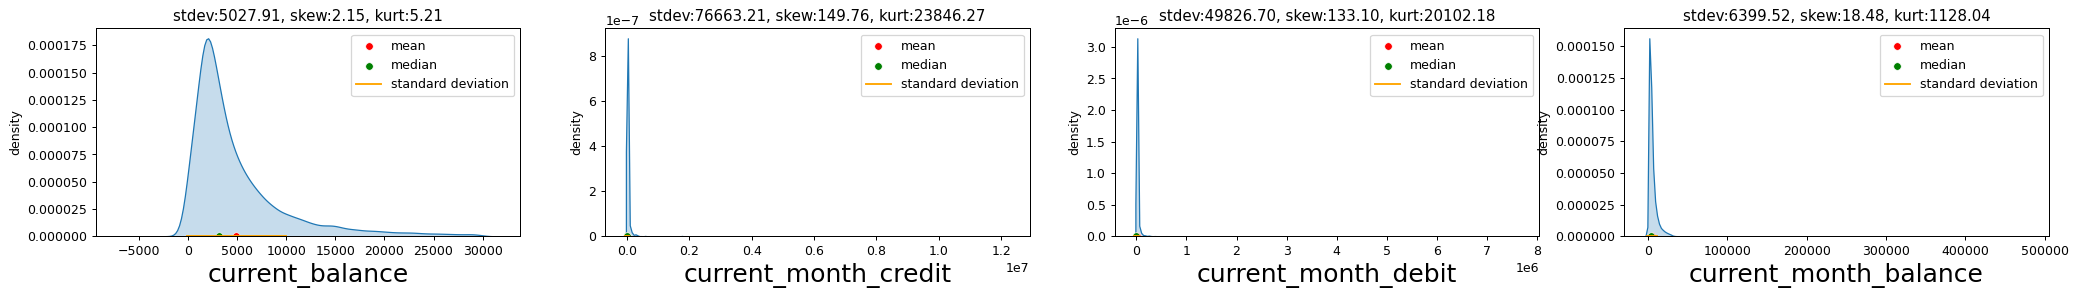

In [ ]:
uva_numeric(cm_data,current_month_details)

In [ ]:
####For cm_data, which now contains the current month financial details (current_balance, current_month_credit, current_month_debit, current_month_balance) after removing extreme outliers, the distributions generally show a concentration of values at the lower end. This indicates that most customers have relatively modest balances and transaction activities in the current month. Although the extreme outliers have been removed, there might still be a positive skew, meaning a few customers have higher financial figures, but these are now within a more reasonable range, making the bulk of the data more visible.



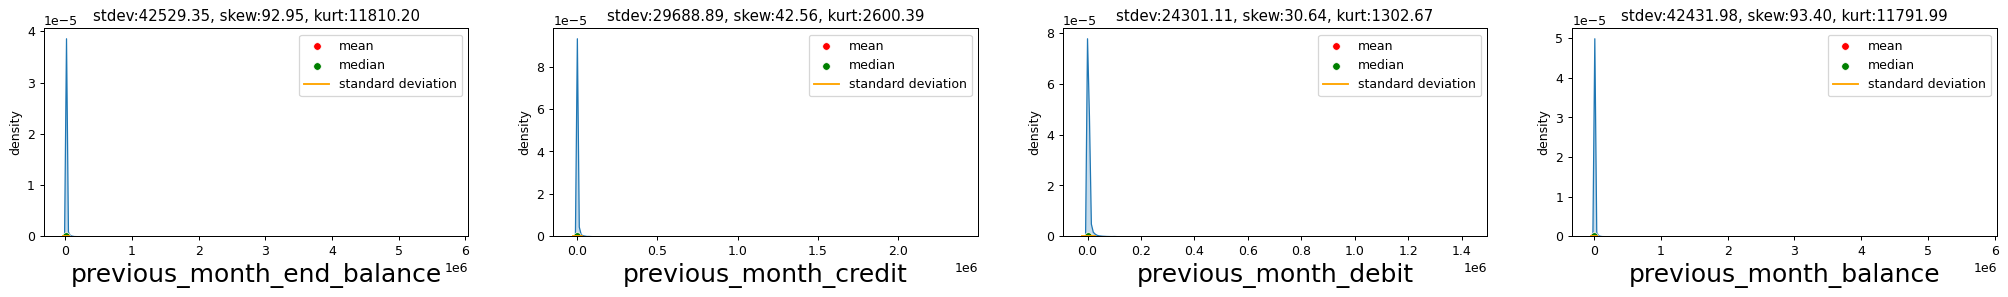

In [ ]:
uva_numeric(data,previous_month_details)

In [ ]:
##The plots for previous_month_details (previous_month_end_balance, previous_month_credit, previous_month_debit, previous_month_balance) likely show similar patterns to the current month's financial data. They would typically exhibit a strong positive skew, indicating that most customers had relatively low balances and transaction activities in the previous month, while a smaller number of customers engaged in significantly higher financial movements. The specific skewness and kurtosis values in the titles will quantify these observations for each metric.



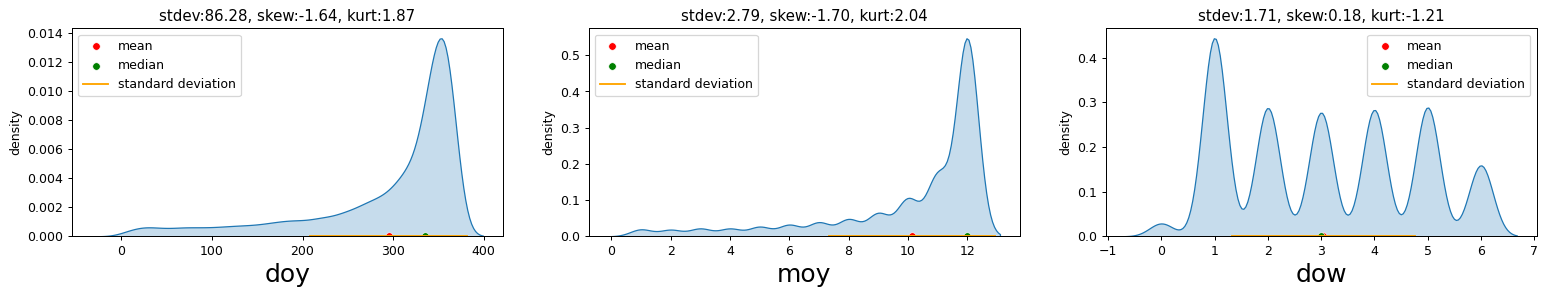

In [ ]:
uva_numeric(data,transaction_date)


In [ ]:
#These plots reveal patterns in when transactions occur. For instance, moy would show which months are most active, dow would highlight busy days of the week, and doy would indicate seasonal trends. The skewness and kurtosis values will quantify if transactions are clustered at certain times or spread evenly throughout the year/week.



overall interpretation  of the dataset :
From the EDA we will get only the presence or absence of ouliers but we will not replace the data having outlier because it will alter the data
so we will just identify the presence or abscence of outlier

